#### EDA

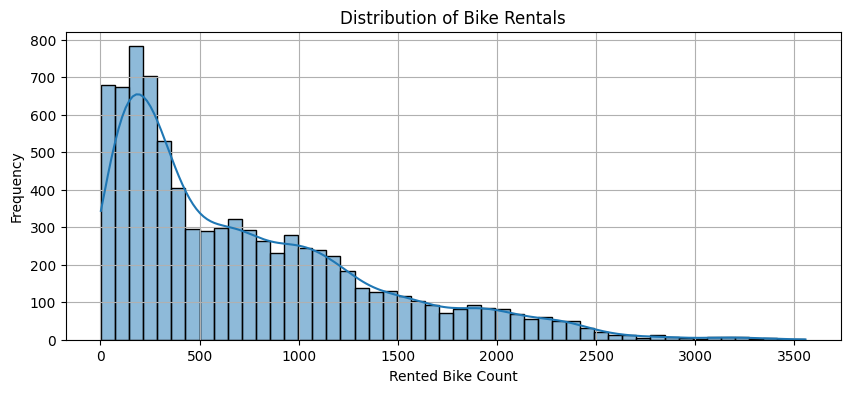

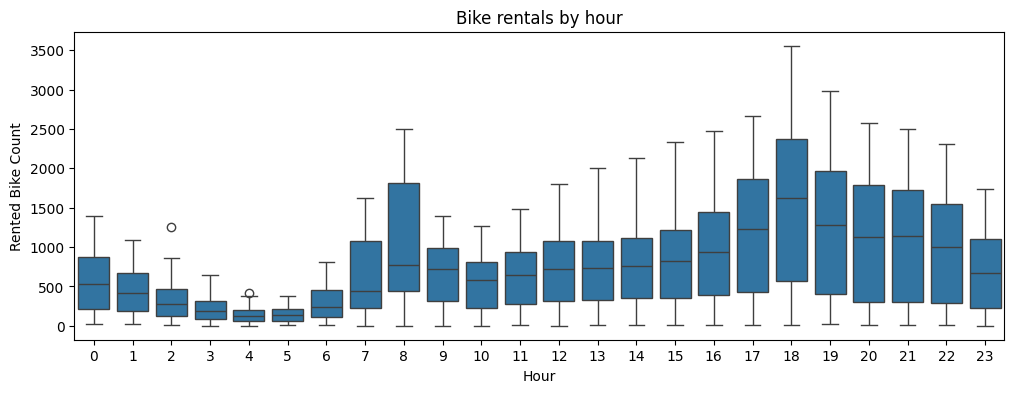

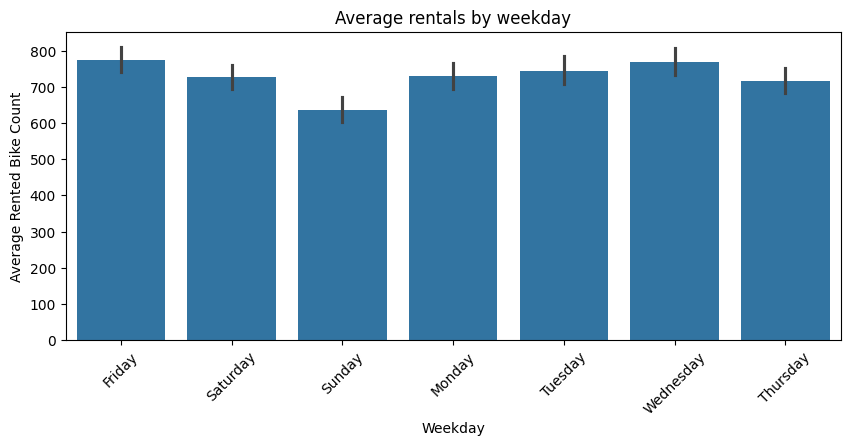

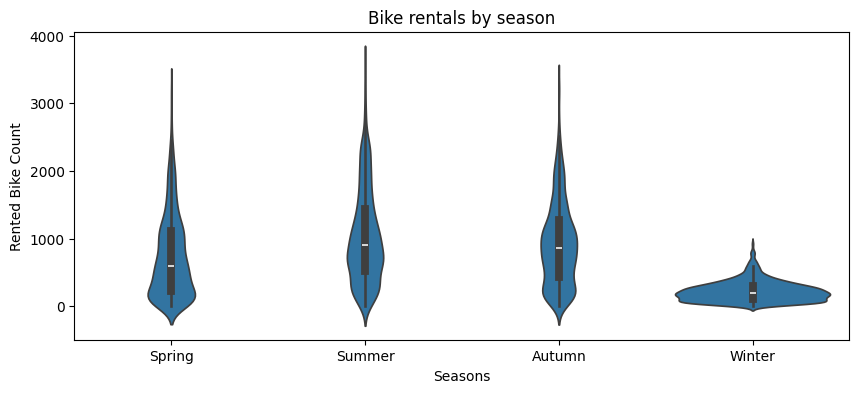

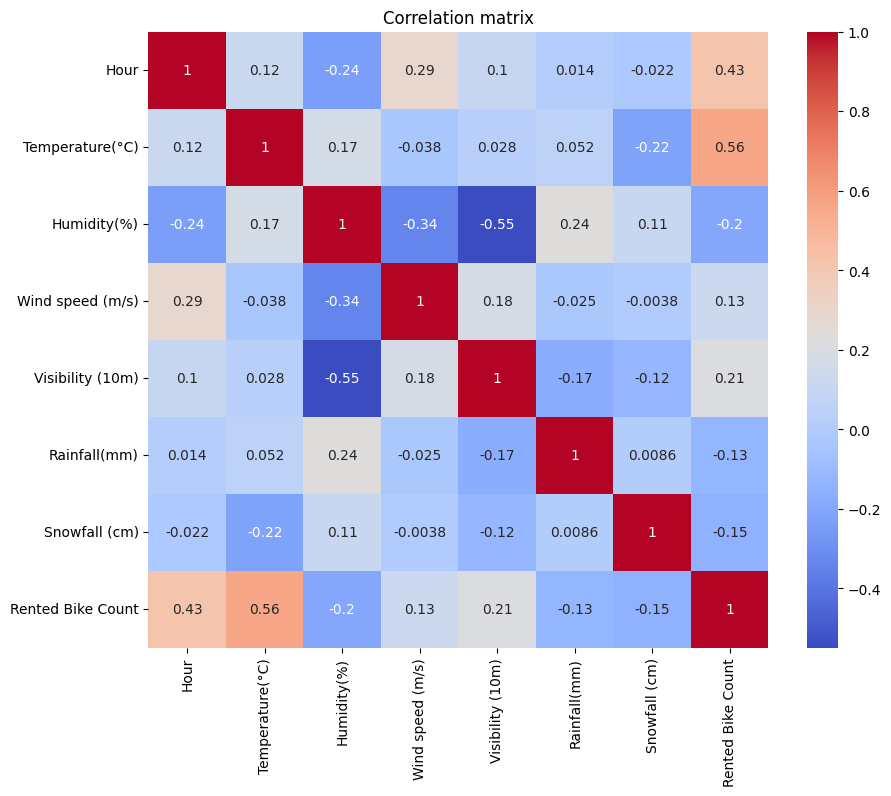

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/SeoulBikeData.csv", encoding='utf-8')

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['day_name'] = df['Date'].dt.day_name()

df = df[df['Functioning Day'] == 'Yes']

df['Holiday'] = df['Holiday'].map({'No': 0, 'Yes': 1})

season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
df['Seasons'] = pd.Categorical(df['Seasons'], categories=season_order, ordered=True)

# 1. 대여량 기본 분포
plt.figure(figsize=(10, 4))
sns.histplot(df['Rented Bike Count'], bins=50, kde=True)
plt.title("Distribution of Bike Rentals")
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 2. 시간대별 대여량 분포
plt.figure(figsize=(12, 4))
sns.boxplot(x='Hour', y='Rented Bike Count', data=df)
plt.title("Bike rentals by hour")
plt.show()

# 3. 요일별 평균 대여량
plt.figure(figsize=(10, 4))
sns.barplot(x='day_name', y='Rented Bike Count', data=df, estimator='mean')
plt.title("Average rentals by weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Rented Bike Count")
plt.xticks(rotation=45)
plt.show()

# 4. 계절별 바이올린플롯
plt.figure(figsize=(10, 4))
sns.violinplot(x='Seasons', y='Rented Bike Count', data=df, order=season_order)
plt.title("Bike rentals by season")
plt.show()

# 5. 상관관계 히트맵
corr_cols = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()
